In [25]:
# Load the required modules and packages
import numpy as np
import pandas as pd
import pandas_datareader as web
import plotly.express as px
import pandas_datareader
import datetime
import pandas_datareader.data as web
import plotly.graph_objects as go

In [26]:
#Set Dates 
start = datetime.datetime(2021, 3, 24)
end = datetime.datetime(2021, 4, 12)
MSFT = web.DataReader('MSFT','yahoo',start,end)
KSU = web.DataReader('KSU','yahoo',start,end)
CRWD = web.DataReader('CRWD','yahoo',start,end)
CCIV = web.DataReader('CCIV','yahoo',start,end)
PLUG = web.DataReader('PLUG','yahoo',start,end)
NIO = web.DataReader('NIO','yahoo',start,end)
TSLA = web.DataReader('TSLA','yahoo',start,end)
AMZN = web.DataReader('AMZN','yahoo',start,end)
BABA = web.DataReader('BABA','yahoo',start,end)
FUTU = web.DataReader('FUTU','yahoo',start,end)

##Banchmark SPY for comparision
SPY = web.DataReader('SPY','yahoo',start,end)

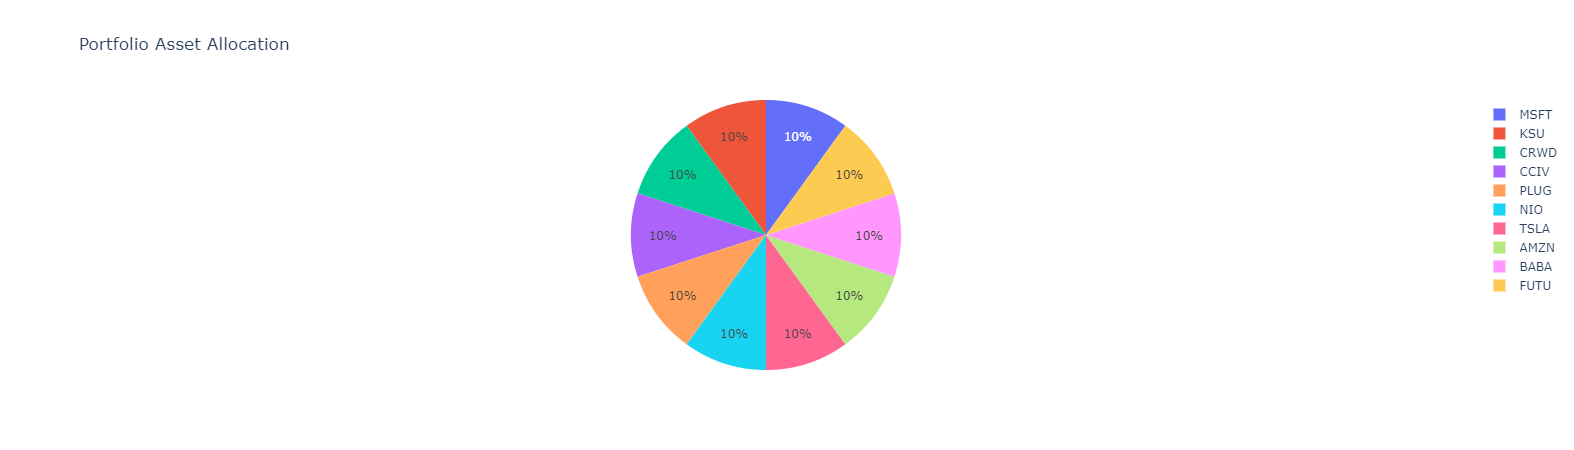

In [27]:
#Portfolio Allocation 
labels = ['MSFT','KSU','CRWD','CCIV', 'PLUG', 'NIO', 'TSLA', 'AMZN', 'BABA', 'FUTU']
allocation_pct = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]

fig0 = go.Figure(data=[go.Pie(labels=labels, values=allocation_pct)])
fig0.update_layout(title="Portfolio Asset Allocation")
fig0.show()

In [28]:
# Calculate the cumulative return
for df in (MSFT, KSU, CRWD, CCIV, PLUG, NIO, TSLA, AMZN, BABA, FUTU, SPY): 
  df['Cum Return'] = df['Adj Close']/df.iloc[0]['Adj Close']

In [29]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close,Cum Return
Date,,,,,,,
2021-03-24,238.000000,235.320007,237.850006,235.460007,25620100,235.460007,1.000000
2021-03-25,236.940002,231.570007,235.300003,232.339996,34061900,232.339996,0.986749
2021-03-26,236.710007,231.550003,231.550003,236.479996,25471700,236.479996,1.004332
2021-03-29,236.800003,231.880005,236.589996,235.240005,25227500,235.240005,0.999066
2021-03-30,233.850006,231.100006,233.529999,231.850006,24792000,231.850006,0.984668


In [30]:
# Calculate value of initial investment of 100K in the Portfolio
init_investment = 1000000
for df, alloc in zip((MSFT, KSU, CRWD, CCIV, PLUG, NIO, TSLA, AMZN, BABA, FUTU, SPY),[.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]):
  df['Value'] = alloc*init_investment*df['Cum Return']

In [31]:
# Calculate value of initial investment of 100K in the SPY
SPY['SPY Total'] = init_investment*SPY['Cum Return']
SPY['SPY Total'] = round(SPY['SPY Total'])

In [32]:
# Combine All dataframes
all_vals = [MSFT['Value'], KSU['Value'], CRWD['Value'], CCIV['Value'], PLUG['Value'], NIO['Value'], TSLA['Value'], AMZN['Value'], BABA['Value'], FUTU['Value']]
portfolio_val = pd.concat(all_vals, axis=1)
portfolio_val.columns = ['MSFT','KSU','CRWD','CCIV', 'PLUG', 'NIO', 'TSLA', 'AMZN', 'BABA', 'FUTU']

In [33]:
# Calculate Cumulative Return and Cumulative Return %
portfolio_val['Portfolio Total'] = round(portfolio_val.sum(axis=1))
portfolio_val['Cum Return'] = portfolio_val['Portfolio Total']/portfolio_val.iloc[0]['Portfolio Total']

In [34]:
portfolio_val.tail()

,MSFT,KSU,CRWD,CCIV,PLUG,NIO,TSLA,AMZN,BABA,FUTU,Portfolio Total,Cum Return
Date,,,,,,,,,,,,
2021-04-06,105266.284525,103376.491209,107037.444025,108421.984324,104427.702928,108225.110906,109733.919381,104429.766639,100426.852651,140092.593727,1091438.0,1.091438
2021-04-07,106132.670845,103895.954166,106789.639955,101152.483311,96265.055271,100838.748325,106457.541992,106229.849662,98183.719572,136048.373086,1061994.0,1.061994
2021-04-08,107555.420360,103183.665175,112031.932880,102659.576222,98253.006573,104707.796866,108493.180161,106874.802831,99411.999274,150240.949871,1093412.0,1.093412
2021-04-09,108659.644444,103183.665175,111607.921731,101817.375253,97289.152093,103138.527803,107417.455781,109236.262103,97264.689717,148067.650229,1087682.0,1.087682
2021-04-12,108685.125442,103789.693283,112329.294404,97650.714575,89397.589226,100487.013825,111377.656991,109469.167131,106280.760660,140376.070101,1079843.0,1.079843


In [35]:
portfolio_val['Cum Return %'] = (portfolio_val['Cum Return'] - 1) * 100
SPY['Cum Return %'] = (SPY['Cum Return'] - 1) * 100
SPY.tail()

,High,Low,Open,Close,Volume,Adj Close,Cum Return,SPY Total,Cum Return %
Date,,,,,,,,,
2021-04-06,407.239990,405.399994,405.760010,406.119995,62021000,406.119995,1.047998,1047998.0,4.799754
2021-04-07,406.959991,405.450012,405.940002,406.589996,55836300,406.589996,1.049210,1049210.0,4.921038
2021-04-08,408.579987,406.929993,407.929993,408.519989,57863100,408.519989,1.054191,1054191.0,5.419075
2021-04-09,411.670013,408.260010,408.390015,411.489990,61060100,411.489990,1.061855,1061855.0,6.185488
2021-04-12,411.929993,410.200012,410.850006,411.640015,56704900,411.640015,1.062242,1062242.0,6.224202


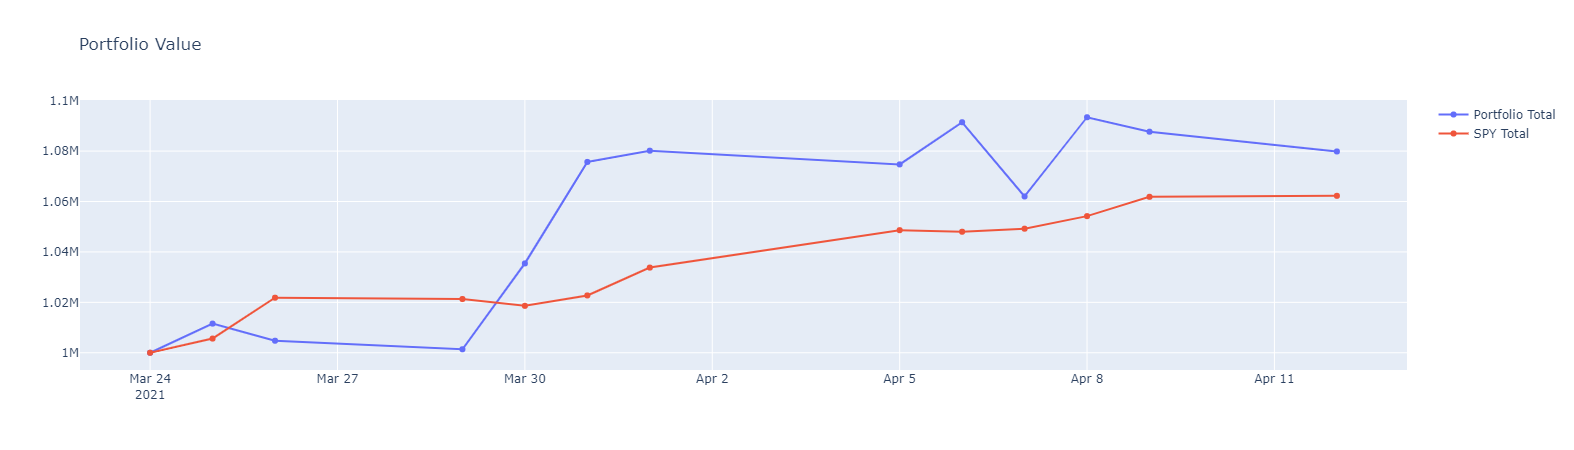

In [36]:
# Visualize Portfolio Value and Compare it to SPY benchmark
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio_val.index, y=portfolio_val['Portfolio Total'], name='Portfolio Total'))
fig.add_trace(go.Scatter(x=SPY.index, y=SPY['SPY Total'],name='SPY Total'))
fig.update_layout(title="Portfolio Value")

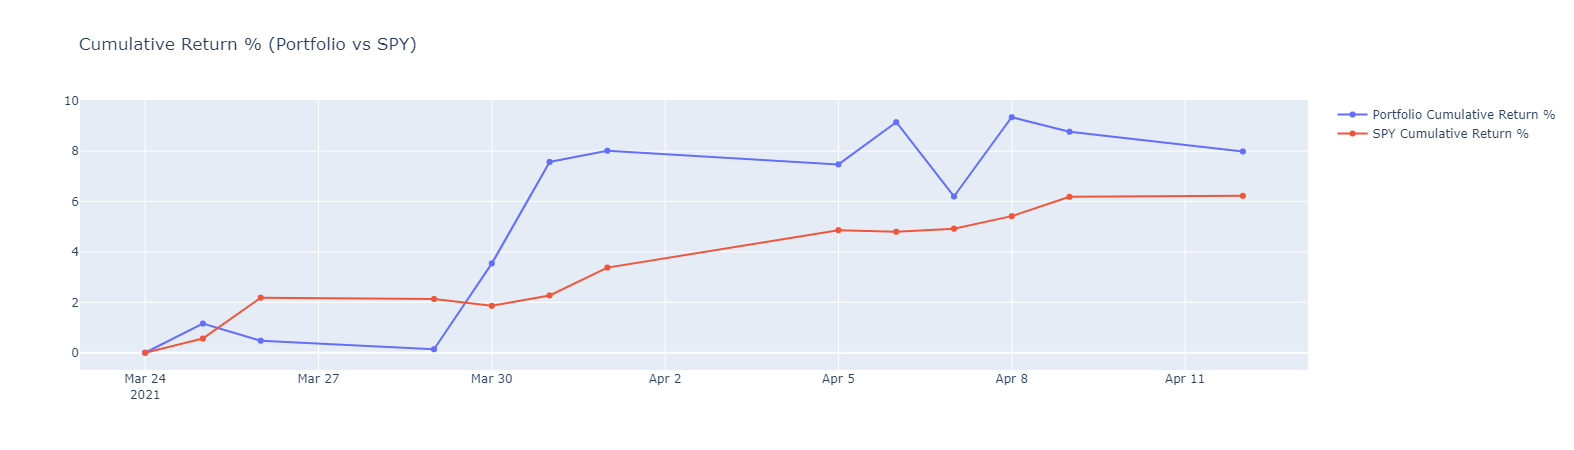

In [37]:
# Visualize Return %
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['Cum Return %'], name='Portfolio Cumulative Return %'))
fig1.add_trace(go.Scatter(x=SPY.index, y=SPY['Cum Return %'],name='SPY Cumulative Return %'))
fig1.update_layout(title="Cumulative Return % (Portfolio vs SPY)")

In [38]:
print("Portfolio Correlation with SPY")
round(portfolio_val['Portfolio Total'].corr(SPY['SPY Total']),2)

Portfolio Correlation with SPY


0.83

In [39]:
'MSFT','KSU','CRWD','CCIV', 'PLUG', 'NIO', 'TSLA', 'AMZN', 'BABA', 'FUTU'

('MSFT', 'KSU', 'CRWD', 'CCIV', 'PLUG', 'NIO', 'TSLA', 'AMZN', 'BABA', 'FUTU')

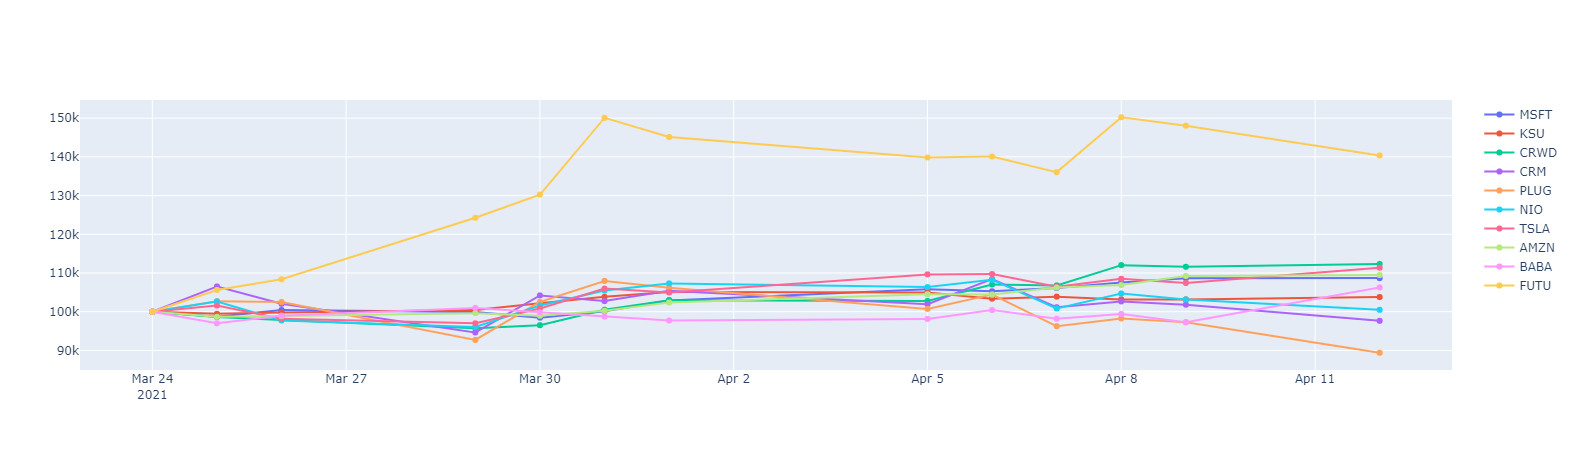

In [40]:
# Visualize Value of Individual Stocks
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['MSFT'], name='MSFT'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['KSU'],name='KSU'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['CRWD'],name='CRWD'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['CCIV'],name='CRM'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['PLUG'],name='PLUG'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['NIO'],name='NIO'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['TSLA'],name='TSLA'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['AMZN'],name='AMZN'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['BABA'],name='BABA'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['FUTU'],name='FUTU'))


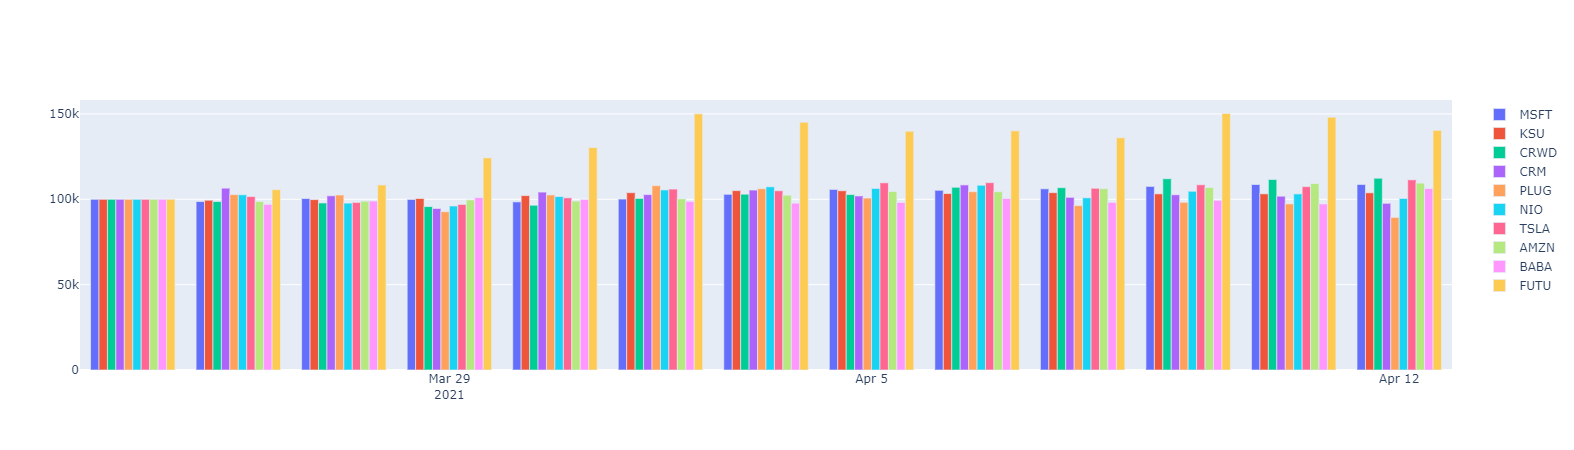

In [41]:
# Visualize Value of Individual Stocks
fig3 = go.Figure()

fig3.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), #hide weekends
        dict(values=["2021-04-02"])  # hide Good Friday Market Holiday
    ]
)
fig3.add_trace(go.Bar(x=portfolio_val.index, y= portfolio_val['MSFT'], name='MSFT'))
fig3.add_trace(go.Bar(x=portfolio_val.index, y= portfolio_val['KSU'],name='KSU'))
fig3.add_trace(go.Bar(x=portfolio_val.index, y= portfolio_val['CRWD'],name='CRWD'))
fig3.add_trace(go.Bar(x=portfolio_val.index, y= portfolio_val['CCIV'],name='CRM'))
fig3.add_trace(go.Bar(x=portfolio_val.index, y= portfolio_val['PLUG'],name='PLUG'))
fig3.add_trace(go.Bar(x=portfolio_val.index, y= portfolio_val['NIO'],name='NIO'))
fig3.add_trace(go.Bar(x=portfolio_val.index, y= portfolio_val['TSLA'],name='TSLA'))
fig3.add_trace(go.Bar(x=portfolio_val.index, y= portfolio_val['AMZN'],name='AMZN'))
fig3.add_trace(go.Bar(x=portfolio_val.index, y= portfolio_val['BABA'],name='BABA'))
fig3.add_trace(go.Bar(x=portfolio_val.index, y= portfolio_val['FUTU'],name='FUTU'))


In [42]:
# initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")

In [43]:
row_of_parallel = pn.Row(fig0, fig, fig1)

In [44]:
# Insert row_of_parallel and row_of_Bar into a column object with Markdown text
plots_as_column = pn.Column(
    "# Portfolio Value vs. SPY benchmark", fig0, fig, fig1, fig2, fig3
)

In [45]:
# Put bar plots in row
row_of_bar = pn.Row(fig)
row_of_bar.append(fig1)

In [46]:
# Create tabs
tabs = pn.Tabs(
    ("DEEGA-S Portfolio", plots_as_column)
)
tabs

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
        [3] Plotly(Figure)
        [4] Plotly(Figure)
        [5] Plotly(Figure)